### Step 1: Importing Data

In [127]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [128]:
# Importing all required libraries


import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import xticks

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

import statsmodels.api as sm

In [129]:
# Reading csv file

df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [130]:
# displaying all columns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

### Step 2: Inspecting the dataframe

In [131]:
# Let's see the head of our master dataset
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [132]:
# Let's check the dimensions of the dataframe
df.shape

(9240, 37)

In [133]:
# let's look at the statistical aspects of the dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [134]:
# Let's check the column names
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [135]:
# Checking type and information of all 37 columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Step 3: Data Cleaning

#### Handeling the 'Select' level that is present in variable "Specialization","How did you hear about X Education", "Lead Profile","City".
#### The value 'Select' is equivalent to Null as it does not holds any meaning for these columns. Hence, need to replace with 'NaN


In [136]:
df1 = df.replace('Select', np.nan)

In [137]:
df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [138]:
# Changing name of the columns to add '_' in it, so that it would be easy to count values of categories using valucount
df1 = df1.rename(columns = {"Lead Source":"Lead_Source", "Last Activity":"Last_Activity","What is your current occupation":"What_is_your_current_occupation","What matters most to you in choosing a course":"What_matters_most_to_you_in_choosing_a_course"})

In [139]:
# Checking the count of each category
df1.Lead_Source.value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
welearnblog_Home        1
testone                 1
blog                    1
Pay per Click Ads       1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
Name: Lead_Source, dtype: int64

In [140]:
# Modifying 'Google' to 'google'
#Replacing all other categories having low count into other platforms
df1['Lead_Source'] = df1['Lead_Source'].replace(['google'], 'Google')
df1['Lead_Source'] = df1['Lead_Source'].replace(['Facebook','bing','blog','Pay per Click Ads','bing', 'Social Media', 'Welearn','WeLearn','Click2call','Live Chat','welearnblog_Home',
                                                  'youtubechannel','testone','Press_Release','NC_EDM','Null'], 'Other_Platforms') 

In [141]:
# Checking if all the values have been stored in other_Platforms
df1.Lead_Source.value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Other_Platforms       78
Name: Lead_Source, dtype: int64

In [142]:
df1.Last_Activity.value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last_Activity, dtype: int64

In [143]:
#Replacing all other categories (in column Last_Activity) having low count into other platforms
df1['Last_Activity'] = df1['Last_Activity'].replace(['Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
                                                     'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails'], 'Other_activities') 

In [144]:
df1.Last_Activity.value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Other_activities              112
Unreachable                    93
Name: Last_Activity, dtype: int64

In [145]:
# Tags is the data which was updated by the marketing team, hence the information under 'Tags' column is not of much help in providing 'hot lead' information.
df1.Tags.value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [146]:
#Replacing all other categories (in column Tags) having low count into other platforms
df1['Tags'] = df1['Tags'].replace(['Diploma holder (Not Eligible)','wrong number given','opp hangup','number not provided','in touch with EINS','Lost to Others','Want to take admission but has financial problems','Still Thinking','Interested in Next batch','In confusion whether part time or DLP','Lateral student','Shall take in the next coming month','University not recognized','Recognition issue (DEC approval)'], 'Other_Tags') 

In [147]:
df1.Tags.value_counts()

Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
switched off                            240
Other_Tags                              219
Busy                                    186
Lost to EINS                            175
Not doing further education             145
Interested  in full time MBA            117
Graduation in progress                  111
invalid number                           83
Name: Tags, dtype: int64

#### Null value Treatment

In [148]:
# Checking the number of missing values in each column
df1.isna().sum(axis=0)

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead_Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last_Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What_is_your_current_occupation                  2690
What_matters_most_to_you_in_choosing_a_course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [149]:
#finding the percentage of null values in each column in the updated dataframe. All should be less than 50%
for i in range (0,36):
    print(i, df1.iloc[0:0,i], '\n Percentage of null values: ', round((1-df1.iloc[:,i].isnull().value_counts(normalize=True)[False])*100,2),'% \n')

0 Series([], Name: Prospect ID, dtype: object) 
 Percentage of null values:  0.0 % 

1 Series([], Name: Lead Number, dtype: int64) 
 Percentage of null values:  0.0 % 

2 Series([], Name: Lead Origin, dtype: object) 
 Percentage of null values:  0.0 % 

3 Series([], Name: Lead_Source, dtype: object) 
 Percentage of null values:  0.39 % 

4 Series([], Name: Do Not Email, dtype: object) 
 Percentage of null values:  0.0 % 

5 Series([], Name: Do Not Call, dtype: object) 
 Percentage of null values:  0.0 % 

6 Series([], Name: Converted, dtype: int64) 
 Percentage of null values:  0.0 % 

7 Series([], Name: TotalVisits, dtype: float64) 
 Percentage of null values:  1.48 % 

8 Series([], Name: Total Time Spent on Website, dtype: int64) 
 Percentage of null values:  0.0 % 

9 Series([], Name: Page Views Per Visit, dtype: float64) 
 Percentage of null values:  1.48 % 

10 Series([], Name: Last_Activity, dtype: object) 
 Percentage of null values:  1.11 % 

11 Series([], Name: Country, dtype:

In [150]:
#finding which columns have more than 40% null values and saving them in a list

j=0
cols_to_drop=[]
for i in range (0,36):
    if round((1-df1.iloc[:,i].isnull().value_counts(normalize=True)[False])*100,2) > 40:
        print(i, df1.columns[i], '\n Percentage of null values: ', round((1-df1.iloc[:,i].isnull().value_counts(normalize=True)[False])*100,2),'% \n')
        cols_to_drop.append(df1.columns[i])
        j = j+1
print('Total columns to drop:',j)
print(cols_to_drop)

13 How did you hear about X Education 
 Percentage of null values:  78.46 % 

25 Lead Quality 
 Percentage of null values:  51.59 % 

28 Lead Profile 
 Percentage of null values:  74.19 % 

30 Asymmetrique Activity Index 
 Percentage of null values:  45.65 % 

31 Asymmetrique Profile Index 
 Percentage of null values:  45.65 % 

32 Asymmetrique Activity Score 
 Percentage of null values:  45.65 % 

33 Asymmetrique Profile Score 
 Percentage of null values:  45.65 % 

Total columns to drop: 7
['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [151]:
#dropping those columns having more than 40% null values

df1.drop(cols_to_drop, axis=1, inplace=True)

In [152]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead_Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [153]:
# The columns having null values:
print((df1.columns[df1.isna().any()]))

Index(['Lead_Source', 'TotalVisits', 'Page Views Per Visit', 'Last_Activity',
       'Country', 'Specialization', 'What_is_your_current_occupation',
       'What_matters_most_to_you_in_choosing_a_course', 'Tags', 'City'],
      dtype='object')


## Univariate analysis
##### To impute the null values, need to understand scewness and central value such as mean/ median/ mode need to plot the data

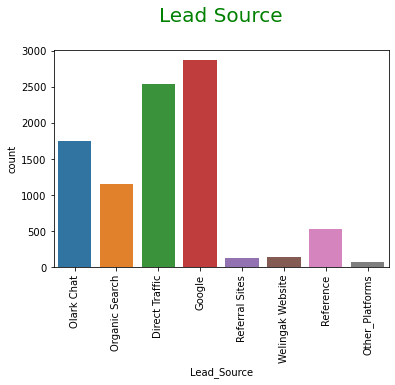

In [154]:
#To check which central value (in this case 'Mode') of column "Lead_Source" to use for imputation.
sns.countplot(df1['Lead_Source'])
# Adding and formatting title
plt.title("Lead Source\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [155]:
# Find out mode
df1['Lead_Source'].mode()

0    Google
dtype: object

In [156]:
# In above case, the values are categorical. Hence, replacing null values with "Google", which is mode.
df1['Lead_Source'] = df1['Lead_Source'].replace(np.nan, 'Google')

In [157]:
# Checking for missing values in Lead_Source column
df1['Lead_Source'].isnull().sum()

0

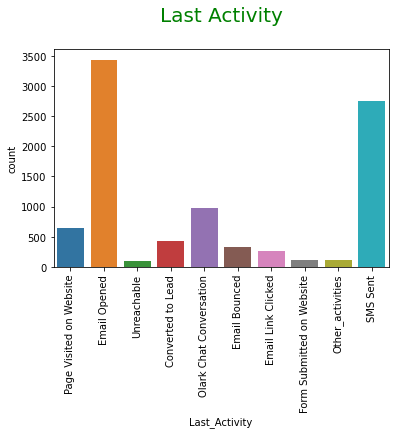

In [158]:
#To check which central value (in this case 'Mode') of column "Last_Activity" to use for imputation.
sns.countplot(df1['Last_Activity'])
# Adding and formatting title
plt.title("Last Activity\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [159]:
# Find out mode
df1['Last_Activity'].mode()

0    Email Opened
dtype: object

In [160]:
# In above case, the values are categorical. Hence, replacing null values with "Email Opened", which is mode.
df1['Last_Activity'] = df1['Last_Activity'].replace(np.nan, 'Email Opened')

In [161]:
# Checking for missing values in Lead_Source column
df1['Last_Activity'].isnull().sum()

0

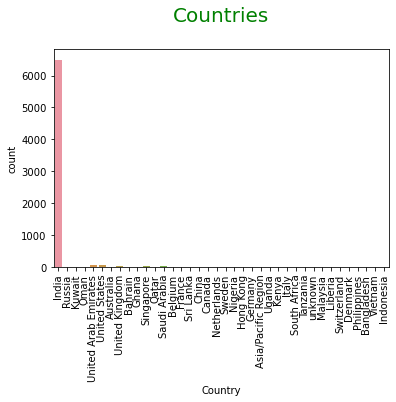

In [162]:
#To check which central value (in this case 'Mode') of column "Country" to use for imputation.
sns.countplot(df1['Country'])
# Adding and formatting title
plt.title("Countries\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [163]:
# Find out mode
df1['Country'].mode()

0    India
dtype: object

In [164]:
# In above case, the values are categorical. Hence, replacing null values with "India", which is mode.
df1['Country'] = df1['Country'].replace(np.nan, 'India')

In [165]:
# Checking for missing values in Lead_Source column
df1['Country'].isnull().sum()

0

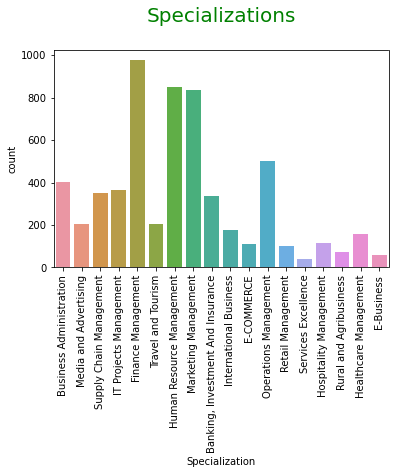

In [166]:
#To check which central value (in this case 'Mode') of column "Specialization" to use for imputation.
sns.countplot(df1['Specialization'])
# Adding and formatting title
plt.title("Specializations\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [167]:
# Find out mode
df1['Specialization'].mode()

0    Finance Management
dtype: object

In [168]:
# In above case, the values are categorical. Hence, replacing null values with "Finance Management", which is mode.
df1['Specialization'] = df1['Specialization'].replace(np.nan, 'India')

In [169]:
# Checking for missing values in Specialization column
df1['Specialization'].isnull().sum()

0

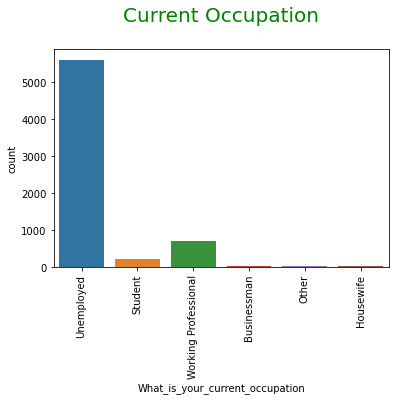

In [170]:
#To check which central value (in this case 'Mode') of column "What_is_your_current_occupation" to use for imputation.
sns.countplot(df1['What_is_your_current_occupation'])
# Adding and formatting title
plt.title("Current Occupation\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [171]:
# Find out mode
df1['What_is_your_current_occupation'].mode()

0    Unemployed
dtype: object

In [172]:
# In above case, the values are categorical. Hence, replacing null values with "Unemployed", which is mode.
df1['What_is_your_current_occupation'] = df1['What_is_your_current_occupation'].replace(np.nan, 'Unemployed')

In [173]:
# Checking for missing values in What_is_your_current_occupation column
df1['What_is_your_current_occupation'].isnull().sum()

0

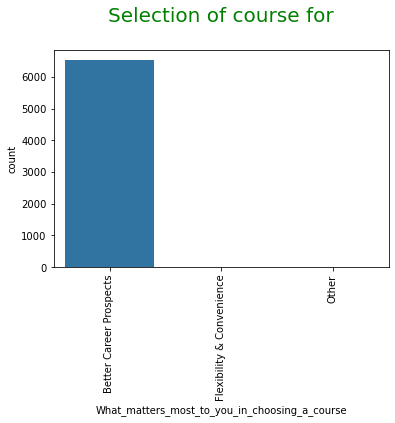

In [174]:
#To check which central value (in this case 'Mode') of column "What_matters_most_to_you_in_choosing_a_course" to use for imputation.
sns.countplot(df1['What_matters_most_to_you_in_choosing_a_course'])
# Adding and formatting title
plt.title("Selection of course for\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [175]:
# Find out mode
df1['What_matters_most_to_you_in_choosing_a_course'].mode()

0    Better Career Prospects
dtype: object

In [176]:
# In above case, the values are categorical. Hence, replacing null values with "Better Career Prospects", which is mode.
df1['What_matters_most_to_you_in_choosing_a_course'] = df1['What_matters_most_to_you_in_choosing_a_course'].replace(np.nan, 'Better Career Prospects')

In [177]:
# Checking for missing values in What_is_your_current_occupation column
df1['What_matters_most_to_you_in_choosing_a_course'].isnull().sum()

0

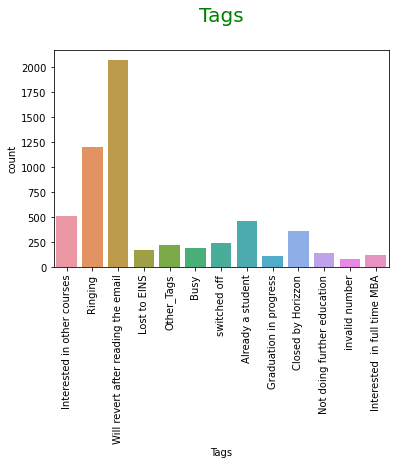

In [178]:
#To check which central value (in this case 'Mode') of column "Tags" to use for imputation.
sns.countplot(df1['Tags'])
# Adding and formatting title
plt.title("Tags\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [179]:
# Find out mode
df1['Tags'].mode()

0    Will revert after reading the email
dtype: object

In [180]:
# In above case, the values are categorical. Hence, replacing null values with "Will revert after reading the email", which is mode.
df1['Tags'] = df1['Tags'].replace(np.nan, 'Will revert after reading the email')

In [181]:
# Checking for missing values in What_is_your_current_occupation column
df1['Tags'].isnull().sum()

0

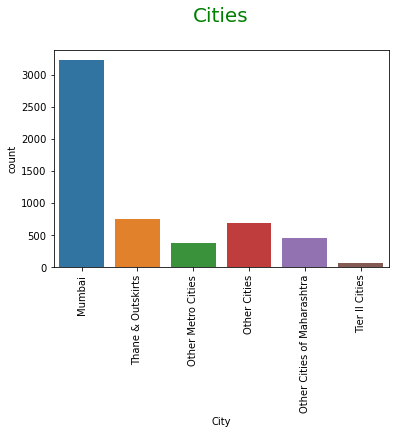

In [182]:
#To check which central value (in this case 'Mode') of column "City" to use for imputation.
sns.countplot(df1['City'])
# Adding and formatting title
plt.title("Cities\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xticks(rotation=90)
plt.show()

In [183]:
# Find out mode
df1['City'].mode()

0    Mumbai
dtype: object

In [184]:
# In above case, the values are categorical. Hence, replacing null values with "Mumbai", which is mode.
df1['City'] = df1['City'].replace(np.nan, 'Mumbai')

In [185]:
# Checking for missing values in What_is_your_current_occupation column
df1['City'].isnull().sum()

0

In [186]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead_Source                                    9240 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [187]:
#Once again, finding the percentage of null values in each column in the updated dataframe.All missing values should be 0.0%
for i in range (0,29):
    print(i, df1.iloc[0:0,i], '\n Percentage of null values: ', round((1-df1.iloc[:,i].isnull().value_counts(normalize=True)[False])*100,2),'% \n')

0 Series([], Name: Prospect ID, dtype: object) 
 Percentage of null values:  0.0 % 

1 Series([], Name: Lead Number, dtype: int64) 
 Percentage of null values:  0.0 % 

2 Series([], Name: Lead Origin, dtype: object) 
 Percentage of null values:  0.0 % 

3 Series([], Name: Lead_Source, dtype: object) 
 Percentage of null values:  0.0 % 

4 Series([], Name: Do Not Email, dtype: object) 
 Percentage of null values:  0.0 % 

5 Series([], Name: Do Not Call, dtype: object) 
 Percentage of null values:  0.0 % 

6 Series([], Name: Converted, dtype: int64) 
 Percentage of null values:  0.0 % 

7 Series([], Name: TotalVisits, dtype: float64) 
 Percentage of null values:  1.48 % 

8 Series([], Name: Total Time Spent on Website, dtype: int64) 
 Percentage of null values:  0.0 % 

9 Series([], Name: Page Views Per Visit, dtype: float64) 
 Percentage of null values:  1.48 % 

10 Series([], Name: Last_Activity, dtype: object) 
 Percentage of null values:  0.0 % 

11 Series([], Name: Country, dtype: o

Dropping Prospect ID column as we dont need this column for our analysis

In [188]:
# Dropping Prospect ID column
df1.drop('Prospect ID', axis = 1, inplace = True)


In [189]:
# Checking if the column has been dropped or not
df1.head()

,Lead Number,Lead Origin,Lead_Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,No,No,Mumbai,No,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,No,No,Mumbai,No,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,India,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,No,No,Mumbai,No,No,Modified


#### Outlier Treatment

In [190]:
#Use skew() function to find the skewness in data 
round(df1.skew(skipna=True),2)

Lead Number                     0.14
Converted                       0.47
TotalVisits                    19.91
Total Time Spent on Website     0.96
Page Views Per Visit            2.87
dtype: float64

As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed.

We can thus see that 'TotalVisits' and 'Page_Views_Per_Visit' are highly skewed towards right. So we need to treat the outlier and see.

In [191]:
df1.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9240 non-null   int64  
 1   Lead Origin                                    9240 non-null   object 
 2   Lead_Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last_Activity                                  9240 

In [192]:
cols = ['Total Time Spent on Website', 'Page Views Per Visit','TotalVisits']

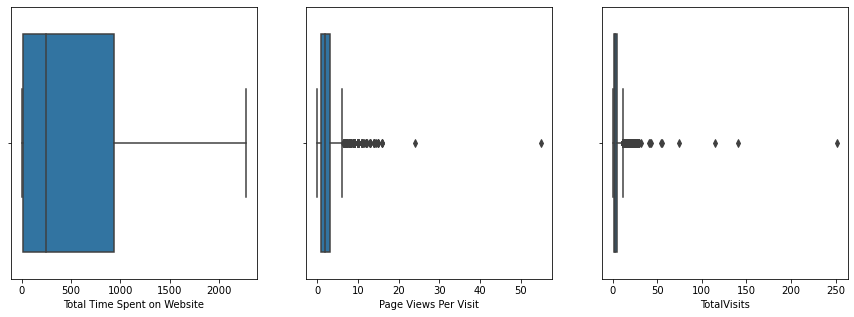

In [193]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(df1[col])
plt.show()

In [194]:
# Removing outliers using 1.5 IQR method
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)

    iqr = q3 - q1

    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)

    df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

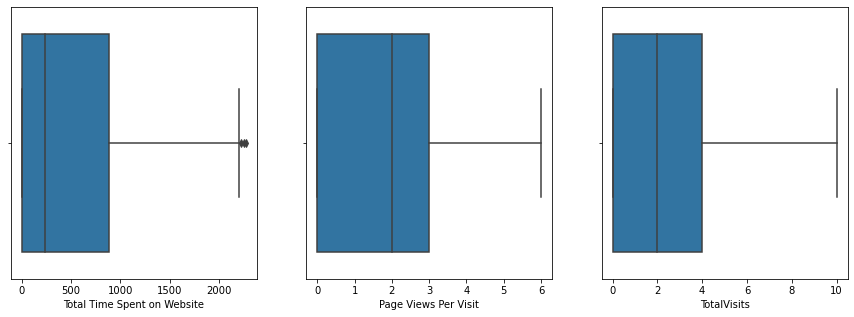

In [195]:
# Plotting for outliers
plt.figure(figsize = (15, 5))
for i, col in enumerate(cols):
    plt.subplot(1,3, i+1)
    sns.boxplot(df[col])
plt.show()

In [196]:
# Changing name of the columns to add '_' in it, so that it would be easy to count values of categories using valucount
df1 = df1.rename(columns = {"Total Time Spent on Website":"Total_Time_Spent_on_Website","Page Views Per Visit":"Page_Views_Per_Visit"})

<AxesSubplot:xlabel='Total_Time_Spent_on_Website', ylabel='Density'>

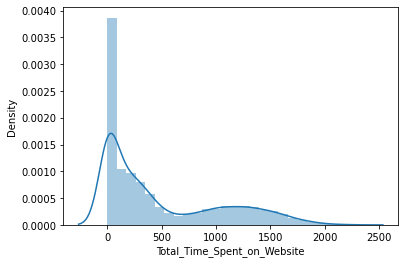

In [197]:
#To check which central value of column "TotalVisits" to use for imputation, whether mean, mode or median
sns.distplot(df1.Total_Time_Spent_on_Website)

<AxesSubplot:xlabel='Page_Views_Per_Visit', ylabel='Density'>

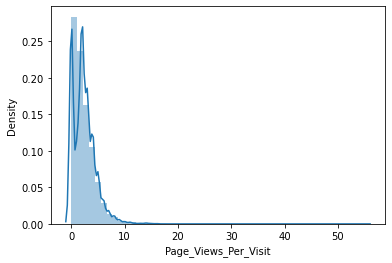

In [198]:
#To check which central value of column "TotalVisits" to use for imputation, whether mean, mode or median
sns.distplot(df1.Page_Views_Per_Visit)

In [199]:
# Checking for outliers in the continuous variables
num_df1 = df1[['Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','TotalVisits']]

In [200]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_df1.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Total_Time_Spent_on_Website,Page_Views_Per_Visit,TotalVisits
count,9240.000000,9103.000000,9103.000000
mean,487.698268,2.362820,3.445238
std,548.021466,2.161418,4.854853
min,0.000000,0.000000,0.000000
25%,12.000000,1.000000,1.000000
50%,248.000000,2.000000,3.000000
75%,936.000000,3.000000,5.000000
90%,1380.000000,5.000000,7.000000
95%,1562.000000,6.000000,10.000000
99%,1840.610000,9.000000,17.000000


### Step 4: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [201]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums', 'Newspaper', 'Digital Advertisement','Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df1[varlist] = df1[varlist].apply(binary_map)

In [202]:
df1.head()

,Lead Number,Lead Origin,Lead_Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,0,0,Modified
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,0,0,Modified


#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [203]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df1[['Lead_Source','Last_Activity','Lead Origin','Country','Specialization', 'What_is_your_current_occupation', 'What_matters_most_to_you_in_choosing_a_course','Tags','City','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
df1 = pd.concat([df1, dummy1], axis=1)

In [204]:
df1.head()

,Lead Number,Lead Origin,Lead_Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other_Platforms,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Other_activities,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_India,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,What_matters_most_to_you_in_choosing_a_course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,India,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,0,0,Modified,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,

In [205]:
# We have created dummies for the below variables, so we can drop them
df1 = df1.drop(['Lead_Source','Last_Activity','Lead Origin','Country','Specialization', 'What_is_your_current_occupation', 'What_matters_most_to_you_in_choosing_a_course','Tags','City','Last Notable Activity'], 1)

In [206]:
df1.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 133 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Lead Number                                                              9240 non-null   int64  
 1   Do Not Email                                                             9240 non-null   int64  
 2   Do Not Call                                                              9240 non-null   int64  
 3   Converted                                                                9240 non-null   int64  
 4   TotalVisits                                                              9103 non-null   float64
 5   Total_Time_Spent_on_Website                                              9240 non-null   int64  
 6   Page_Views_Per_Visit                                                   

In [207]:
# Once again verifying if there are any null values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Number                                                                0.00
Do Not Email                                                               0.00
Do Not Call                                                                0.00
Converted                                                                  0.00
TotalVisits                                                                1.48
Total_Time_Spent_on_Website                                                0.00
Page_Views_Per_Visit                                                       1.48
Search                                                                     0.00
Magazine                                                                   0.00
Newspaper Article                                                          0.00
X Education Forums                                                         0.00
Newspaper                                                                  0.00
Digital Advertisement                   

In [208]:
# Removing NaN TotalVisits rows
df1 = df1[~np.isnan(df1['TotalVisits'])]

In [209]:
# Removing NaN Page_Views_Per_Visit rows
df1 = df1[~np.isnan(df1['Page_Views_Per_Visit'])]

In [210]:
#Verifying if the null value rows have been removed
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Lead Number                                                                0.0
Do Not Email                                                               0.0
Do Not Call                                                                0.0
Converted                                                                  0.0
TotalVisits                                                                0.0
Total_Time_Spent_on_Website                                                0.0
Page_Views_Per_Visit                                                       0.0
Search                                                                     0.0
Magazine                                                                   0.0
Newspaper Article                                                          0.0
X Education Forums                                                         0.0
Newspaper                                                                  0.0
Digital Advertisement                               

### Step 5: Test-Train Split

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
# Putting feature variable to X
X = df1.drop(['Converted','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other_Platforms,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Other_activities,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_India,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,What_matters_most_to_you_in_choosing_a_course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,

In [213]:
# Putting response variable to y
y = df1['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [214]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [215]:
est = sm.OLS(y, X.astype(float)).fit()

### Step 6: Feature Scaling

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
scaler = StandardScaler()

X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead_Source_Google,Lead_Source_Olark Chat,Lead_Source_Organic Search,Lead_Source_Other_Platforms,Lead_Source_Reference,Lead_Source_Referral Sites,Lead_Source_Welingak Website,Last_Activity_Email Bounced,Last_Activity_Email Link Clicked,Last_Activity_Email Opened,Last_Activity_Form Submitted on Website,Last_Activity_Olark Chat Conversation,Last_Activity_Other_activities,Last_Activity_Page Visited on Website,Last_Activity_SMS Sent,Last_Activity_Unreachable,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Country_Australia,Country_Bahrain,Country_Bangladesh,Country_Belgium,Country_Canada,Country_China,Country_Denmark,Country_France,Country_Germany,Country_Ghana,Country_Hong Kong,Country_India,Country_Indonesia,Country_Italy,Country_Kenya,Country_Kuwait,Country_Liberia,Country_Malaysia,Country_Netherlands,Country_Nigeria,Country_Oman,Country_Philippines,Country_Qatar,Country_Russia,Country_Saudi Arabia,Country_Singapore,Country_South Africa,Country_Sri Lanka,Country_Sweden,Country_Switzerland,Country_Tanzania,Country_Uganda,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam,Country_unknown,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_India,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What_is_your_current_occupation_Housewife,What_is_your_current_occupation_Other,What_is_your_current_occupation_Student,What_is_your_current_occupation_Unemployed,What_is_your_current_occupation_Working Professional,What_matters_most_to_you_in_choosing_a_course_Flexibility & Convenience,What_matters_most_to_you_in_choosing_a_course_Other,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,0,0,-0.092900,1.476324,-0.394072,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5520,0,0,0.695064,-0.771066,2.111481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [218]:
### Checking the Conversion Rate
Converted = (sum(df1['Converted'])/len(df1['Converted'].index))*100
Converted

38.02043282434362

We have almost 38% Conversion rate

In [219]:
X_train.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6372 entries, 7962 to 5734
Data columns (total 131 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Do Not Email                                                             6372 non-null   int64  
 1   Do Not Call                                                              6372 non-null   int64  
 2   TotalVisits                                                              6372 non-null   float64
 3   Total_Time_Spent_on_Website                                              6372 non-null   float64
 4   Page_Views_Per_Visit                                                     6372 non-null   float64
 5   Search                                                                   6372 non-null   int64  
 6   Magazine                                                            

### Step 7: Looking at Correlations

In [220]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

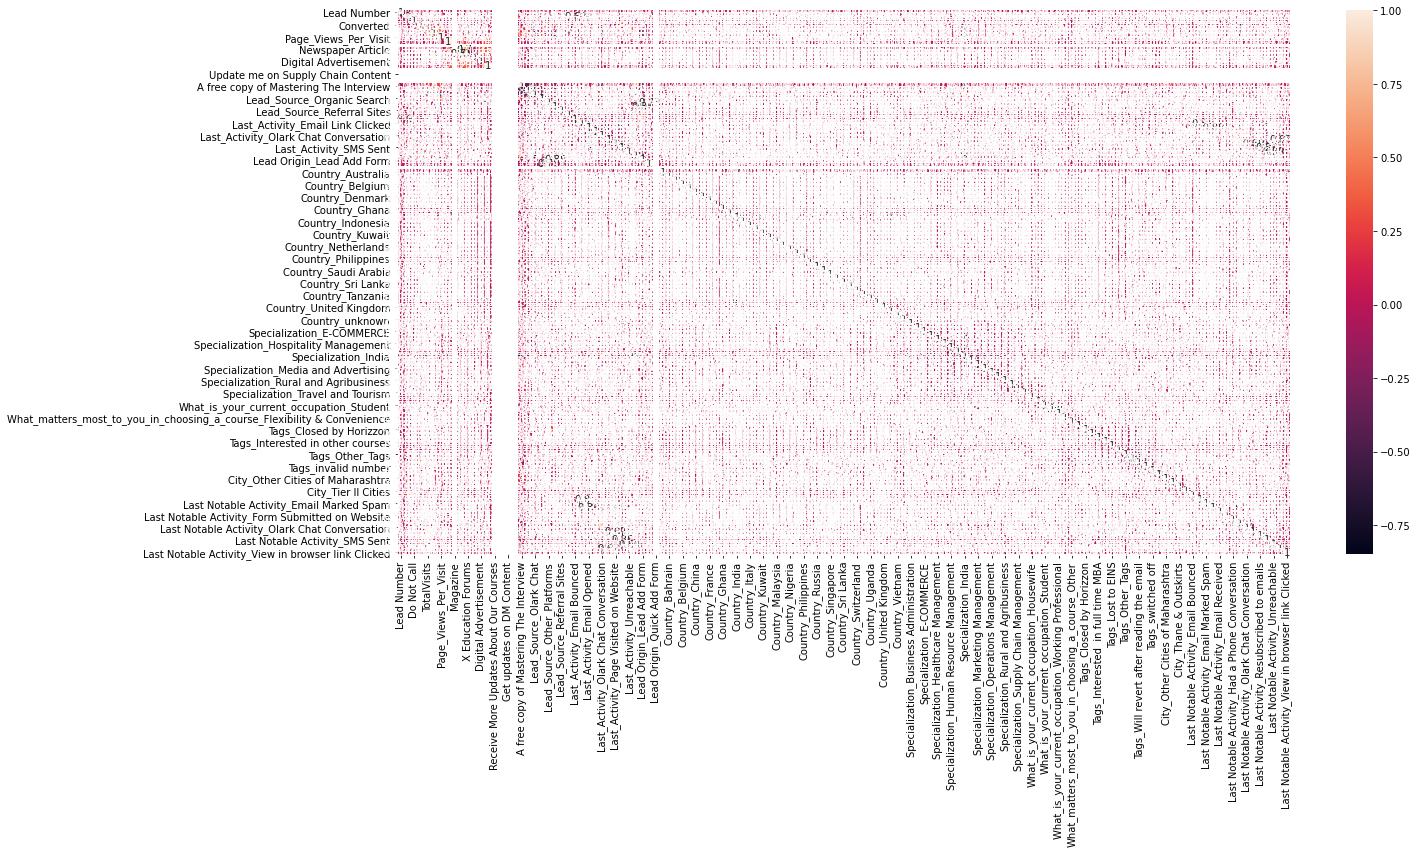

In [221]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(df1.corr(),annot = True)
plt.show()

#### From correlation matrix it is not clear, which variables are to be dropped

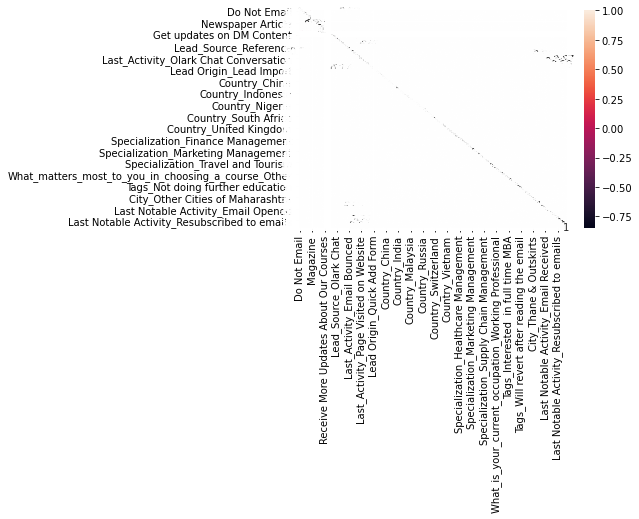

In [222]:
# Hence, crating heatmap only to check correlation between 'Lead Number' and 'Converted'
sns.heatmap(df1.drop(['Lead Number','Converted'], axis = 1).corr(),annot=True)
plt.show()

From above graph we cannot check multicolinearity, Hence, we will start building the model.

### Step 8: Model Building
Let's start by splitting our data into a training set and a test set.

In [223]:
import statsmodels.api as sm

In [224]:
est = sm.OLS(y, X.astype(float)).fit()

In [225]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                          120
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 17 May 2021   Deviance:                          nan
Time:                        22:29:51   Pearson chi2:                 4.52e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.15e+15      9e+07  -1.28e+07      0.000   -1.15e+15   -1.15e+15
Do Not Email                                                            -3.814e+14   4.42e+06  -8.62e+07      0.000   -3.81e+14   -3.81e+14
Do Not Call                                                              9.084e+14   4.77e+07    1.9e+07      0.000    9.08e+14    9.08e+14
TotalVisits                                                              5.057e+13   1.02e+06   4.97e+07      0.000    5.06e+13    5.06e+13
Total_Time_Spent_on_Website                                              3.836e+14   1.01e+06   3.81e+08      0.000    3.84e+14    3.84e+14
Page_Views_Per_Visit                                                    -4.904e+13   1.22e+06  -4.01e+07      0.000    -4.9e+13    -4.9e+13
Search                                                                  -2.049e+14   2.23e+07  -9.18e+06      0.000   -2.05e+14   -2.05e+14
Magazine                                                                 -546.6854   1.89e-06  -2.89e+08      0.000    -546.685    -546.685
Newspaper Article                                                       -8.105e+14   4.24e+07  -1.91e+07      0.000    -8.1e+14    -8.1e+14
X Education Forums                                                      -8.105e+14   4.24e+07  -1.91e+07      0.000    -8.1e+14    -8.1e+14
Newspaper                                                               -1.147e+16   6.73e+07   -1.7e+08      0.000   -1.15e+16   -1.15e+16
Digital Advertisement                                                   -5.251e+13    3.9e+07  -1.35e+06      0.000   -5.25e+13   -5.25e+13
Through Recommendations                                                  8.592e+14   3.16e+07   2.72e+07      0.000    8.59e+14    8.59e+14
Receive More Updates About Our Courses                                   -525.6222   1.26e-06  -4.17e+08      0.000    -525.622    -525.622
Update me on Supply Chain Content                                         123.7138   6.23e-07   1.98e+08      0.000     123.714     123.714
Get updates on DM Content                                                  58.5636   6.54e-07   8.96e+07      0.000      58.564      58.564
I agree to pay the amount through cheque                                 -167.0433   4.46e-07  -3.75e+08      0.000    -167.043    -167.043
A free copy of Mastering The Interview                                  -7.952e+13   2.71e+06  -2.94e+07      0.000   -7.95e+13   -7.95e+13
Lead_Source_Google                                                       6.777e+12   2.87e+06   2.36e+06      0.000    6.78e+12    6.78e+12
Lea

### Step 9: Feature Selection Using RFE

In [226]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [227]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE on 15 top features
rfe = rfe.fit(X_train, y_train)

In [228]:
rfe.support_

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False,  True, False, False,  True,
        True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [229]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 66),
 ('TotalVisits', False, 63),
 ('Total_Time_Spent_on_Website', False, 4),
 ('Page_Views_Per_Visit', False, 65),
 ('Search', False, 81),
 ('Magazine', False, 108),
 ('Newspaper Article', False, 60),
 ('X Education Forums', False, 52),
 ('Newspaper', False, 80),
 ('Digital Advertisement', False, 98),
 ('Through Recommendations', False, 87),
 ('Receive More Updates About Our Courses', False, 109),
 ('Update me on Supply Chain Content', False, 113),
 ('Get updates on DM Content', False, 111),
 ('I agree to pay the amount through cheque', False, 114),
 ('A free copy of Mastering The Interview', False, 40),
 ('Lead_Source_Google', False, 100),
 ('Lead_Source_Olark Chat', False, 20),
 ('Lead_Source_Organic Search', False, 50),
 ('Lead_Source_Other_Platforms', False, 73),
 ('Lead_Source_Reference', False, 41),
 ('Lead_Source_Referral Sites', False, 62),
 ('Lead_Source_Welingak Website', True, 1),
 ('Last_Activity_Email Bounced', False, 25

In [230]:
col = X_train.columns[rfe.support_]

In [231]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total_Time_Spent_on_Website',
       'Page_Views_Per_Visit', 'Search', 'Magazine', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       ...
       'Last Notable Activity_Email Received',
       'Last Notable Activity_Form Submitted on Website',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website',
       'Last Notable Activity_Resubscribed to emails',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed',
       'Last Notable Activity_View in browser link Clicked'],
      dtype='object', length=116)

##### Assessing the model with StatsModels

In [232]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.5
Date:                Mon, 17 May 2021   Deviance:                       4095.0
Time:                        22:30:03   Pearson chi2:                 1.09e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.4619      0.320     -7.682      0.000      -3.090      -1.834
Do Not Email                                            -1.6764      0.187     -8.962      0.000      -2.043      -1.310
Lead_Source_Welingak Website                             1.8832      0.793      2.375      0.018       0.329       3.437
Last_Activity_Other_activities                           1.7808      0.380      4.692      0.000       1.037       2.525
Lead Origin_Lead Add Form                                2.5619      0.291      8.810      0.000       1.992       3.132
Country_United Kingdom                                   2.2588      1.048      2.156      0.031       0.206       4.312
Specialization_India                                    -0.9466      0.083    -11.429      0.000      -1.109      -0.784
What_is_your_current_occupation_Unemployed              -1.5060      0.301     -4.999      0.000      -2.097      -0.916
What_is_your_current_occupation_Working Professional     1.1403      0.373      3.057      0.002       0.409       1.871
Tags_Busy                                                3.0607      0.292     10.496      0.000       2.489       3.632
Tags_Closed by Horizzon                                  8.1158      0.741     10.947      0.000       6.663       9.569
Tags_Lost to EINS                                        8.3181      0.745     11.160      0.000       6.857       9.779
Tags_Ringing                                            -1.1213      0.301     -3.719      0.000      -1.712      -0.530
Tags_Will revert after reading the email                 3.6118      0.196     18.424      0.000       3.228       3.996
Tags_switched off                                       -1.4337      0.624     -2.296      0.022      -2.658      -0.210
Last Notable Activity_SMS Sent                           2.6104      0.107     24.441      0.000       2.401       2.820
========================================================================================================================
"""

In [233]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.204657
5520    0.287586
1962    0.001747
1566    0.908066
9170    0.007286
5097    0.213710
8954    0.077363
309     0.411914
5519    0.787132
1050    0.411914
dtype: float64

In [234]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.2046573 , 0.287586  , 0.00174682, 0.90806592, 0.00728583,
       0.21371009, 0.07736331, 0.4119136 , 0.78713231, 0.4119136 ])

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [250]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['CustID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID
0,0,0.224985,7962
1,0,0.291760,5520
2,0,0.001743,1962
3,1,0.906466,1566
4,0,0.008163,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [251]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,predicted
0,0,0.224985,7962,0
1,0,0.291760,5520,0
2,0,0.001743,1962,0
3,1,0.906466,1566,1
4,0,0.008163,9170,0


In [252]:
from sklearn import metrics

In [253]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3814  139]
 [ 780 1639]]


In [336]:
# Predicted        not_converted    converted
# Actual
# not_converted         3810           143
# converted             750            1669  

In [256]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8557752667922159


#### Checking VIFs

In [257]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [258]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.88
3,Lead Origin_Lead Add Form,1.59
5,Specialization_India,1.50
13,Last Notable Activity_SMS Sent,1.49
1,Lead_Source_Welingak Website,1.35
6,What_is_your_current_occupation_Working Profes...,1.21
8,Tags_Closed by Horizzon,1.16
10,Tags_Ringing,1.14
0,Do Not Email,1.10
2,Last_Activity_Other_activities,1.05


In [259]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2060.5
Date:                Mon, 17 May 2021   Deviance:                       4121.0
Time:                        22:38:29   Pearson chi2:                 1.07e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.8326      0.192    -19.935      0.000      -4.209      -3.456
Do Not Email                                            -1.6659      0.187     -8.931      0.000      -2.031      -1.300
Lead_Source_Welingak Website                             1.8454      0.792      2.331      0.020       0.294       3.397
Last_Activity_Other_activities                           1.7361      0.378      4.598      0.000       0.996       2.476
Lead Origin_Lead Add Form                                2.5831      0.288      8.976      0.000       2.019       3.147
Country_United Kingdom                                   2.1599      1.038      2.080      0.037       0.125       4.195
Specialization_India                                    -0.9674      0.083    -11.715      0.000      -1.129      -0.806
What_is_your_current_occupation_Working Professional     2.5909      0.235     11.012      0.000       2.130       3.052
Tags_Busy                                                2.9458      0.289     10.209      0.000       2.380       3.511
Tags_Closed by Horizzon                                  8.0132      0.740     10.823      0.000       6.562       9.464
Tags_Lost to EINS                                        8.2081      0.744     11.027      0.000       6.749       9.667
Tags_Ringing                                            -1.2414      0.299     -4.149      0.000      -1.828      -0.655
Tags_Will revert after reading the email                 3.5129      0.193     18.159      0.000       3.134       3.892
Tags_switched off                                       -1.5504      0.623     -2.487      0.013      -2.772      -0.328
Last Notable Activity_SMS Sent                           2.5958      0.106     24.413      0.000       2.387       2.804
========================================================================================================================
"""

In [260]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8557752667922159


The accuracy is still practically the same.

In [245]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [ ]:
##### Let's now check the VIFs again

In [262]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Tags_Will revert after reading the email,1.88
3,Lead Origin_Lead Add Form,1.59
5,Specialization_India,1.50
13,Last Notable Activity_SMS Sent,1.49
1,Lead_Source_Welingak Website,1.35
6,What_is_your_current_occupation_Working Profes...,1.21
8,Tags_Closed by Horizzon,1.16
10,Tags_Ringing,1.14
0,Do Not Email,1.10
2,Last_Activity_Other_activities,1.05


All variables have a good value of VIF. So we need not drop any more variables and we can proceed with making predictions using this model only

In [263]:
# Let's take a look at the confusion matrix again 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3814,  139],
       [ 780, 1639]], dtype=int64)

In [264]:
# Actual/Predicted          not_Converted    Converted
        # not_Converted        3269             366
        # Converted            595              692  

In [266]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8557752667922159

## Metrics beyond simply accuracy

In [267]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [268]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6775527077304672

In [269]:
# Let us calculate specificity
TN / float(TN+FP)

0.9648368327852264

In [270]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03516316721477359


In [271]:
# positive predictive value 
print (TP / float(TP+FP))

0.921822272215973


In [272]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8302133217239878


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [274]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [276]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

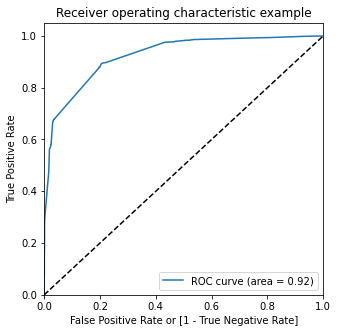

In [277]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [279]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.224985,7962,0,1,1,1,0,0,0,0,0,0,0
1,0,0.291760,5520,0,1,1,1,0,0,0,0,0,0,0
2,0,0.001743,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.906466,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.008163,9170,0,1,0,0,0,0,0,0,0,0,0


In [280]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.702134  0.977263  0.533772
0.2   0.2  0.722065  0.976023  0.566658
0.3   0.3  0.831921  0.878876  0.803187
0.4   0.4  0.831921  0.878876  0.803187
0.5   0.5  0.855775  0.677553  0.964837
0.6   0.6  0.856246  0.677139  0.965849
0.7   0.7  0.855618  0.669698  0.969390
0.8   0.8  0.825643  0.579992  0.975968
0.9   0.9  0.821092  0.558909  0.981533


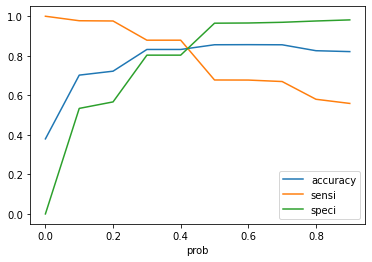

In [281]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [283]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,CustID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.224985,7962,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.291760,5520,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.001743,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.906466,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.008163,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [285]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8319209039548022

In [286]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3175,  778],
       [ 293, 2126]], dtype=int64)

In [287]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [288]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8788755684167011

In [289]:
# Let us calculate specificity
TN / float(TN+FP)

0.8031874525676701

In [290]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19681254743232987


In [291]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7320936639118457


In [292]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9155132641291811


## Precision and Recall

In [293]:
#Looking at the confusion matrix again

In [294]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3814,  139],
       [ 780, 1639]], dtype=int64)

##### Precision
TP / TP + FP

In [295]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.921822272215973

##### Recall
TP / TP + FN

In [297]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6775527077304672

Using sklearn utilities for the same

In [298]:
from sklearn.metrics import precision_score, recall_score

In [299]:
?precision_score

In [301]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.921822272215973

In [303]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6775527077304672

### Precision and recall tradeoff

In [304]:
from sklearn.metrics import precision_recall_curve

In [305]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       0
 5       0
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      0
 13      0
 14      1
 15      1
 16      0
 17      0
 18      1
 19      0
 20      0
 21      1
 22      0
 23      0
 24      0
 25      1
 26      0
 27      0
 28      1
 29      0
 30      1
 31      0
 32      1
 33      0
 34      1
 35      0
 36      0
 37      1
 38      1
 39      1
 40      0
 41      0
 42      0
 43      0
 44      0
 45      1
 46      0
 47      0
 48      0
 49      0
 50      0
 51      0
 52      0
 53      0
 54      1
 55      0
 56      1
 57      0
 58      0
 59      0
 60      0
 61      0
 62      0
 63      0
 64      1
 65      0
 66      0
 67      1
 68      1
 69      0
 70      0
 71      0
 72      0
 73      0
 74      0
 75      1
 76      0
 77      1
 78      1
 79      1
 80      0
 81      1
 82      0
 83      0
 84      1
 85      1
 86      1
 87      0
 88      1
 89      0
 90      1

In [306]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

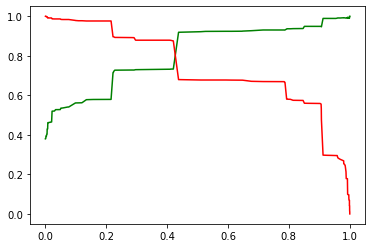

In [307]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [309]:
X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']] = scaler.transform(X_test[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']])

In [310]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Lead_Source_Welingak Website,Last_Activity_Other_activities,Lead Origin_Lead Add Form,Country_United Kingdom,Specialization_India,What_is_your_current_occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_SMS Sent
3504,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0,0,0,1,0,0,0,0,0,0,0,1,0,1
7201,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1196,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8219,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [311]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [313]:
y_test_pred = res.predict(X_test_sm)

In [314]:
y_test_pred[:10]

3504    0.006218
4050    0.992303
7201    0.052018
1196    0.006218
8219    0.987574
8747    0.216342
9048    0.049595
6524    0.021194
7693    0.052018
8187    0.296815
dtype: float64

In [315]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [316]:
# Let's see the head
y_pred_1.head()

,0
3504,0.006218
4050,0.992303
7201,0.052018
1196,0.006218
8219,0.987574


In [317]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [318]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [319]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [320]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [321]:
y_pred_final.head()

,Converted,CustID,0
0,0,3504,0.006218
1,1,4050,0.992303
2,0,7201,0.052018
3,0,1196,0.006218
4,1,8219,0.987574


In [322]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [325]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Lead Number','Converted','Conversion_Prob'], axis=1)

In [326]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob
0,NaN,0,0.006218
1,NaN,1,0.992303
2,NaN,0,0.052018
3,NaN,0,0.006218
4,NaN,1,0.987574


In [328]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [329]:
y_pred_final.head()

,Lead Number,Converted,Conversion_Prob,final_predicted
0,NaN,0,0.006218,0
1,NaN,1,0.992303,1
2,NaN,0,0.052018,0
3,NaN,0,0.006218,0
4,NaN,1,0.987574,1


In [331]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.838886854632003

In [332]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1386,  303],
       [ 137,  905]], dtype=int64)

In [333]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [334]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8685220729366603

In [335]:
# Let us calculate specificity
TN / float(TN+FP)

0.8206039076376554

# Please ignore below code as of now

In [246]:
y_train_pred[:10]

array([0.22498513, 0.2917599 , 0.00174308, 0.90646583, 0.00816259,
       0.21634157, 0.0773964 , 0.42074361, 0.78728582, 0.42074361])

In [247]:
y_train_pred_final['Conversion_Prob'] = y_train_pred

In [248]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0. else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,CustID,predicted
0,0,0.224985,7962,0
1,0,0.291760,5520,0
2,0,0.001743,1962,0
3,1,0.906466,1566,1
4,0,0.008163,9170,0


In [249]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8557752667922159


In [327]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

AttributeError: 'DataFrame' object has no attribute 'Churn_Prob'